In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

#Import required csv files
genomeTagsFilePath = "C:\\Users\\Ben\\OneDrive\\School\\School 2020-21\\Citadel Datathon\\West Coast Datathon Materials\\movie_lense\\movie_lense\\genome-tags.csv"
genomeScoresFilePath = "C:\\Users\\Ben\\OneDrive\\School\\School 2020-21\\Citadel Datathon\\West Coast Datathon Materials\\movie_lense\\movie_lense\\genome-scores.csv"
moviesFilePath = "C:\\Users\\Ben\\OneDrive\\School\\School 2020-21\\Citadel Datathon\\West Coast Datathon Materials\\movie_lense\\movie_lense\\movies.csv"

genomeTags = pd.read_csv(genomeTagsFilePath)
genomeScores = pd.read_csv(genomeScoresFilePath)
movies = pd.read_csv(moviesFilePath)

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
genomeTags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [4]:
genomeScores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [151]:
#Create joined matrix with title, tag, and relevance
joinedDf = genomeScores.set_index('tagId').join(genomeTags.set_index('tagId'))
joinedDf = joinedDf.sort_values('movieId',axis=0).reset_index()

joinedDf = joinedDf.set_index('movieId').join(movies.set_index('movieId'))

joinedDf = joinedDf[['title','tag','relevance']]

joinedDf = joinedDf.drop_duplicates(['title','tag'])

#Create pivot table to show relevance across the tags for each movie
pivotedDf = joined.pivot(index='title', columns='tag', values='relevance')
pivoted

tag,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,3d,70mm,80s,9/11,aardman,aardman studios,abortion,absurd,action,action packed,adaptation,adapted from:book,adapted from:comic,adapted from:game,addiction,adolescence,adoption,adultery,adventure,affectionate,afi 100,afi 100 (laughs),afi 100 (movie quotes),africa,afterlife,aging,aids,airplane,airport,alaska,...,visceral,visual,visually appealing,visually stunning,visuals,voodoo,voyeurism,war,war movie,wartime,waste of time,watch the credits,weapons,wedding,weed,weird,werewolf,werewolves,western,whimsical,wilderness,wine,wistful,witch,witches,witty,wizards,women,working class,workplace,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.04650,0.05525,0.04800,0.03850,0.07125,0.01925,0.01200,0.04325,0.01525,0.02175,0.03275,0.15150,0.11100,0.00450,0.00250,0.01625,0.00850,0.12450,0.14275,0.11250,0.51325,0.26325,0.08000,0.01525,0.29525,0.04150,0.05250,0.08950,0.12150,0.12025,0.01425,0.06100,0.05775,0.00575,0.31475,0.09600,0.05900,0.00875,0.00675,0.00725,...,0.08250,0.24000,0.58675,0.21400,0.11450,0.01225,0.10475,0.01600,0.03150,0.05425,0.00900,0.04650,0.23525,0.03675,0.08675,0.25550,0.07125,0.02900,0.04550,0.30450,0.05275,0.05725,0.02425,0.05675,0.03800,0.19325,0.06350,0.20150,0.03375,0.07150,0.08125,0.02525,0.02100,0.01975,0.16225,0.04600,0.03925,0.01050,0.09350,0.01375
$5 a Day (2008),0.17825,0.18275,0.01775,0.01700,0.21725,0.03175,0.04650,0.11950,0.01525,0.01900,0.03175,0.01550,0.28300,0.00525,0.00400,0.03875,0.00775,0.13375,0.15425,0.09850,0.22450,0.11450,0.08950,0.17475,0.10225,0.06300,0.24000,0.03250,0.21575,0.05650,0.04025,0.11150,0.10600,0.00950,0.21025,0.58475,0.04675,0.00450,0.00550,0.01550,...,0.05875,0.08850,0.13225,0.07600,0.12600,0.02525,0.03950,0.02100,0.05200,0.04450,0.00425,0.03350,0.27600,0.00450,0.42450,0.23300,0.03325,0.00875,0.01625,0.12650,0.29175,0.03525,0.03475,0.01625,0.02175,0.31375,0.04300,0.14575,0.13550,0.42275,0.10825,0.02250,0.02800,0.11700,0.47250,0.03250,0.01825,0.03450,0.10175,0.01500
$9.99 (2008),0.01775,0.02375,0.01900,0.03550,0.07950,0.05450,0.01100,0.20350,0.02525,0.01575,0.02375,0.01675,0.07525,0.00725,0.02675,0.34375,0.00900,0.37575,0.11775,0.08750,0.29725,0.26375,0.05900,0.01150,0.41125,0.36875,0.18125,0.20375,0.13375,0.10300,0.02000,0.04575,0.05875,0.01725,0.12650,0.16200,0.04475,0.00650,0.01550,0.00125,...,0.08075,0.15900,0.26825,0.09600,0.03200,0.01875,0.08425,0.02275,0.02750,0.03325,0.00400,0.00750,0.22775,0.04325,0.18800,0.51000,0.12250,0.02050,0.01950,0.18325,0.03825,0.18375,0.26275,0.00975,0.03275,0.19450,0.08700,0.07025,0.21450,0.19350,0.03900,0.03775,0.02375,0.10875,0.16225,0.05825,0.01150,0.00800,0.11600,0.01650
'71 (2014),0.01425,0.01400,0.04575,0.04950,0.12775,0.07925,0.03300,0.54025,0.07775,0.03175,0.02300,0.02175,0.05200,0.01550,0.00350,0.02100,0.02775,0.13025,0.29650,0.11950,0.24775,0.16050,0.03100,0.01025,0.09075,0.07200,0.02450,0.10825,0.07250,0.11300,0.01625,0.02650,0.04200,0.10400,0.01575,0.06350,0.10175,0.00475,0.02575,0.00600,...,0.70850,0.13550,0.14600,0.08250,0.03450,0.00900,0.10400,0.63175,0.54775,0.38200,0.00325,0.01525,0.48350,0.00375,0.01825,0.28350,0.05150,0.01275,0.01225,0.06725,0.11000,0.05450,0.01825,0.00825,0.02125,0.13200,0.01925,0.18450,0.20850,0.05900,0.92975,0.23600,0.05500,0.05400,0.14275,0.03375,0.01225,0.12650,0.10600,0.02250
'Hellboy': The Seeds of Creation (2004),0.02700,0.02250,0.03825,0.04600,0.09225,0.04150,0.01700,0.10600,0.11650,0.09525,0.04025,0.08325,0.21925,0.01075,0.00400,0.05200,0.01075,0.15625,0.39850,0.23900,0.36650,0.32225,0.35950,0.01275,0.07225,0.04250,0.10600,0.22125,0.38425,0.14475,0.02350,0.04100,0.13650,0.04125,0.04575,0.05425,0.03350,0.03700,0.02800,0.02325,...,0.18550,0.19625,0.36975,0.18925,0.06100,0.01325,0.06325,0.08525,0.03050,0.09650,0.00375,0.06175,0.33575,0.07050,0.02925,0.35325

In [78]:
tagList = genomeTags['tag'].tolist()
tagList

X = pivoted[tagList].values

kmeans = KMeans(n_clusters=250)

predictions = kmeans.fit_predict(X)

predictions.shape


(13173,)

In [129]:
test = movies['title'].tolist()

clustered = pd.concat([movies['title'], pd.DataFrame({'group':predictions})], axis=1)
clustered

,title,group
0,Toy Story (1995),154.0
1,Jumanji (1995),74.0
2,Grumpier Old Men (1995),106.0
3,Waiting to Exhale (1995),234.0
4,Father of the Bride Part II (1995),8.0
...,...,...
58093,The Great Glinka (1946),NaN
58094,Les tribulations d'une caissière (2011),NaN
58095,Her Name Was Mumu (2016),NaN
58096,Flora (2017),NaN


In [149]:
cluster = clustered.loc[clustered['group'] == 3]['title'].tolist()
cluster

[&#39;Drop Dead Fred (1991)&#39;,
 &#39;Freaky Friday (1977)&#39;,
 &#39;Ronin (1998)&#39;,
 &#39;Jeremiah Johnson (1972)&#39;,
 &#39;Hustler, The (1961)&#39;,
 &#39;Committed (2000)&#39;,
 &#39;Shaft (1971)&#39;,
 &#39;Beverly Hills Cop II (1987)&#39;,
 &#39;Aberdeen (2000)&#39;,
 &#39;Carmen Jones (1954)&#39;,
 &#39;Time Machine, The (2002)&#39;,
 &#39;After Dark, My Sweet (1990)&#39;,
 &#39;Unforgiven, The (1960)&#39;,
 &#39;Jet Lag (Décalage horaire) (2002)&#39;,
 &#39;Tremors (1990)&#39;,
 &#39;Things You Can Tell Just by Looking at Her (2000)&#39;,
 &quot;Something&#39;s Gotta Give (2003)&quot;,
 &#39;Dreamers, The (2003)&#39;,
 &#39;Tokyo Godfathers (2003)&#39;,
 &#39;Set-Up, The (1949)&#39;,
 &#39;Gamera vs. Jiger (1970)&#39;,
 &#39;Nothing (2003)&#39;,
 &#39;Ruggles of Red Gap (1935)&#39;,
 &#39;Cinderella Liberty (1973)&#39;,
 &#39;White Countess, The (2005)&#39;,
 &#39;Nanny McPhee (2005)&#39;,
 &#39;Long Weekend, The (2005)&#39;,
 &#39;Journey to Italy (Viaggio in Italia) (

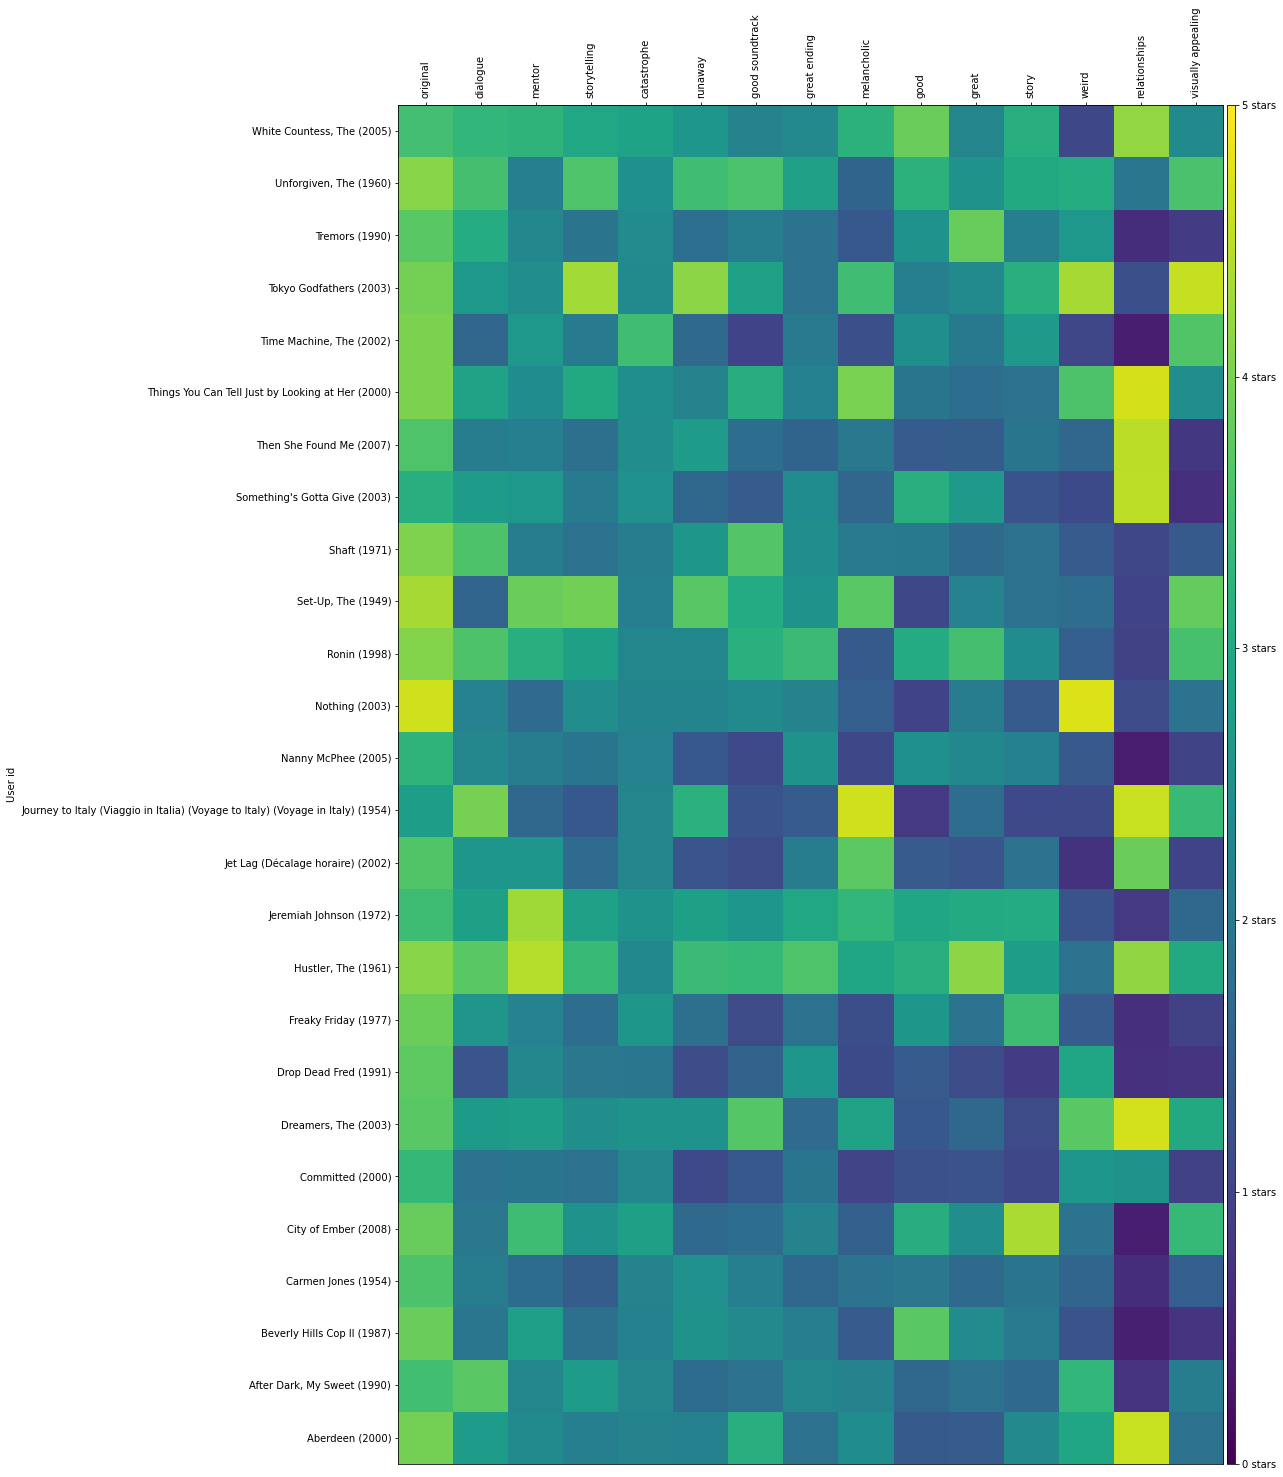

In [150]:

#reduced_pivot = pivoted.loc[pivoted['title'].isin(cluster)]

reduced_pivot = pivoted.loc[pivoted.index.isin(cluster)]

reduced_pivot = findTopGenomeTags(reduced_pivot)
draw_movies_heatmap(reduced_pivot)

In [120]:
# Define the plotting heatmap function
def draw_movies_heatmap(pivoted, axis_labels=True):
    
    fig = plt.figure(figsize=(15,25))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(pivoted,  interpolation='nearest', vmin=0, vmax=1, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(pivoted.shape[0]) , minor=False)
        ax.set_xticks(np.arange(pivoted.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = pivoted.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(pivoted.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
# Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
# Color bar
    cbar = fig.colorbar(heatmap, ticks=[1, 0.8, 0.6, 0.4, 0.2, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
plt.show()
# Print the heatmap
#draw_movies_heatmap(pivoted.iloc[:10,:30])

In [117]:
def findTopGenomeTags(pivoted, numTagsToReturn = 15):
    meanRelevance = pivoted.mean()
    meanRelevance = meanRelevance.sort_values(ascending=False)

    topNTags = meanRelevance.iloc[:numTagsToReturn].index.values.tolist()

    pivoted = pivoted[topNTags]
    #print(pivoted.head())  
    
    return pivoted

    
#findTopGenomeTags(pivoted.iloc[:50,:50])

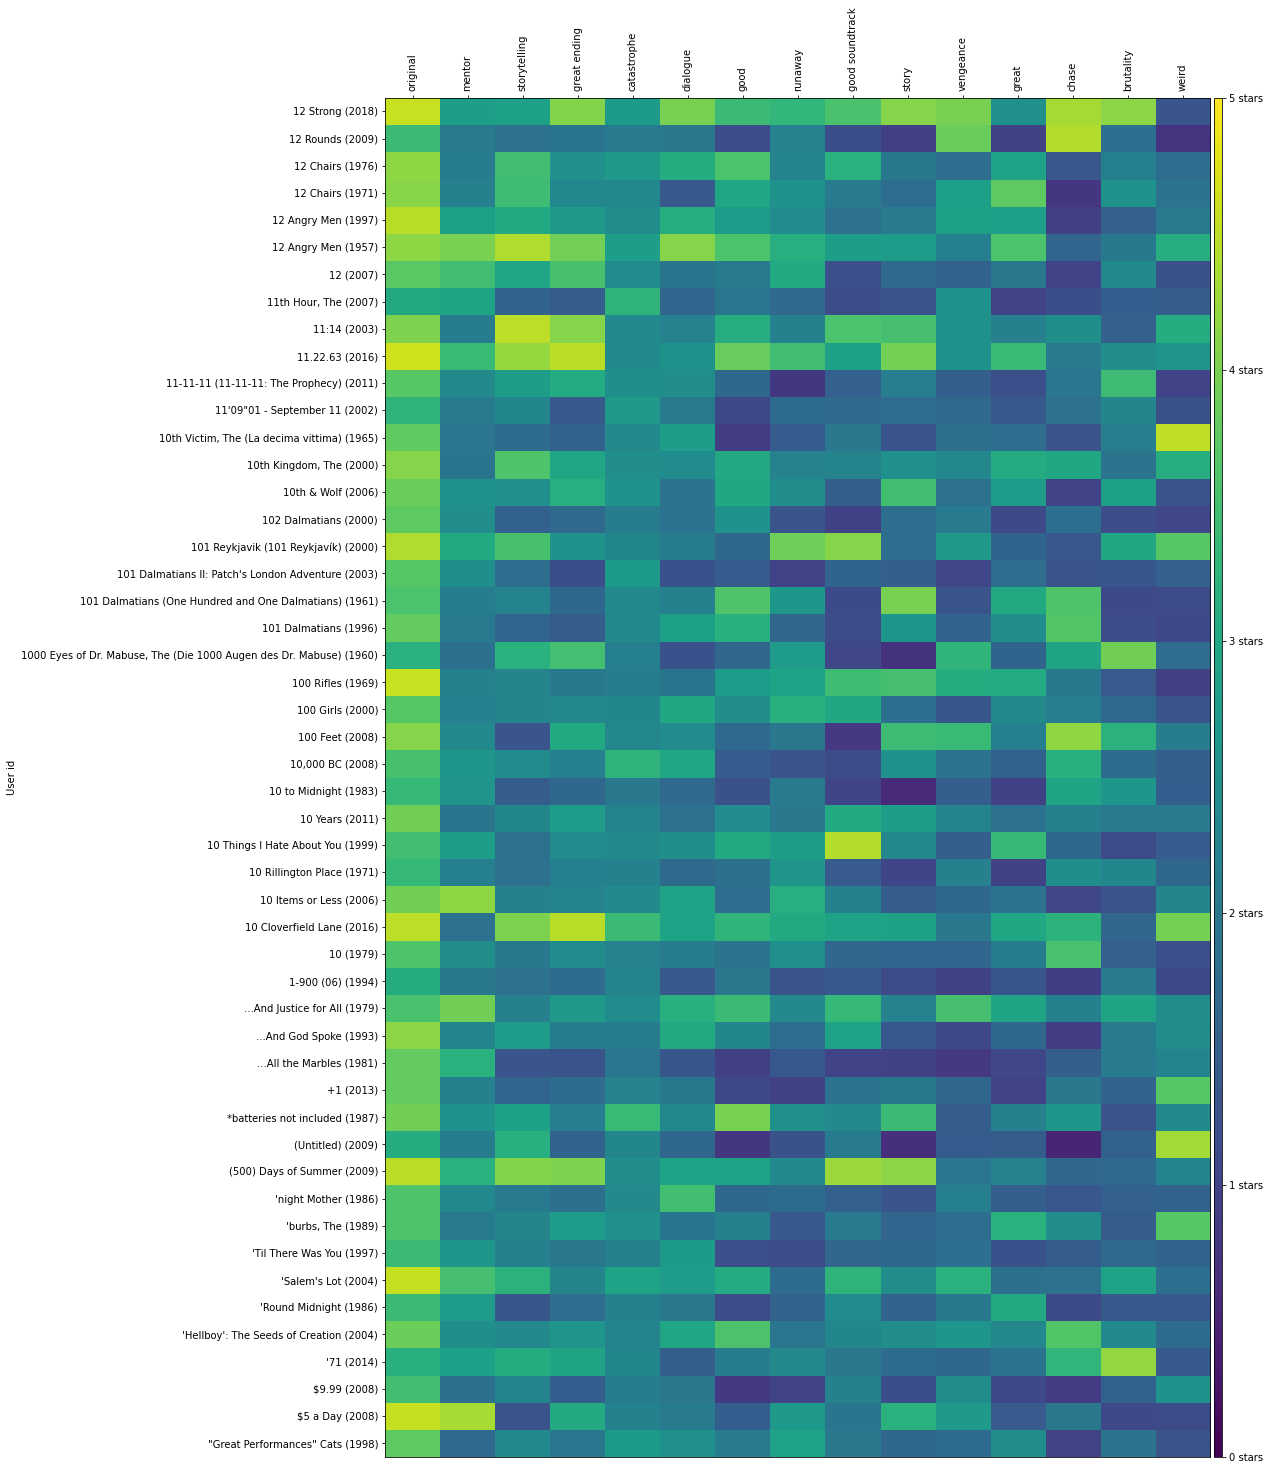

In [119]:
reduced_pivot = findTopGenomeTags(pivoted.iloc[:50])
draw_movies_heatmap(reduced_pivot)